<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>


---

## Домашнее задание 2: библиотека Numpy и линейная алгебра


Импортируем библиотеки:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import ndimage  # спецификатор для работы с изображениями
from scipy import misc 
from PIL import Image

%matplotlib inline

*Вопросы для самопроверки:*
1. Что такое NumPy?
2. Зачем используется и почему работает быстрее?
3. Что такое линейная алгебра?
4. Как она связана с машинным обучением и глубоким обучением?

### Задание 1

В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета numpy и с ним.

In [28]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((2,2))
b = np.random.sample((2,2))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
# тут можно писать код 
print(a.ndim, b.ndim)
# ========

print(a)
print('====')
print(b)

2 2
[[0.6625385  0.53707766]
 [0.61143243 0.87915811]]
====
[[0.24575244 0.54715961]
 [0.46276592 0.11657915]]


In [158]:
def mul(a, b):
    
    result = [[0 for column in range(len(b[0]))] for row in range(len(a))]

    for k in range(len(a)):

        for i in range(len(a)):
            tmp = 0
            for j in range(len(b)):
                tmp += a[k][j] * b[j][i]
            result[k][i] = tmp

    return result
    
mul(a,b)

[[0.4113616862754358, 0.42512636456817876],
 [0.5571054240444968, 0.4370426406027864]]

In [159]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    return np.dot(a, b)

np_mult(a, b)

array([[0.41136169, 0.42512636],
       [0.55710542, 0.43704264]])

In [164]:
%%time
# засечем время работы функции без NumPy
mul(a,b)

Wall time: 0 ns


[[0.4113616862754358, 0.42512636456817876],
 [0.5571054240444968, 0.4370426406027864]]

In [166]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

Wall time: 0 ns


array([[0.41136169, 0.42512636],
       [0.55710542, 0.43704264]])

### Задание 2

Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.
Аналогично -- с помощью библиотеки NumPy и без нее. Сравните скорость, объясните результат.

In [152]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    S = [0 for i in range(len(A))]
    for i in range(1, len(S)):
        S[i] = np.mean(A[:i])
    return S

A = np.random.uniform(size=10)

sec_av(A)

[0,
 0.639517295780553,
 0.3716961615368083,
 0.5435459748399735,
 0.5480582008354917,
 0.47928873155513496,
 0.46990870144755803,
 0.529477443565985,
 0.48127930310036665,
 0.4681143732488644]

In [155]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    for i in range(1, len(S)):
        S[i] = sum(A[:i]) / i
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = np.random.uniform(size=10)

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:

print(stupid_sec_av(A))
print(sec_av(A))

np.abs(np.array(S1) - np.array(S2)).sum()



Wall time: 0 ns
Wall time: 0 ns
[0, 0.4142651287578004, 0.24928352602272236, 0.48102033971507313, 0.4279523408018159, 0.46327710892056667, 0.5168677229895365, 0.5674383061905518, 0.5879593167926321, 0.5769785611959946]
[0, 0.4142651287578004, 0.24928352602272236, 0.48102033971507313, 0.4279523408018159, 0.46327710892056667, 0.5168677229895365, 0.5674383061905518, 0.5879593167926321, 0.5769785611959946]


0.0

### Задание 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив $X$ с преобразованным $X$ и вывести в обратном порядке.

In [279]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    N = np.array(X[::-1])
    N[1::2] = a
    N[::2] = N[::2] ** 3
    return np.concatenate((np.array(X), N))

X = np.random.uniform(size=10) 

%time S1 = transformation(X)

print(S1)

Wall time: 0 ns
[0.34730417 0.49294936 0.32159966 0.92299432 0.82353793 0.88004879
 0.23570265 0.62923447 0.06584128 0.36992547 0.05062239 1.
 0.24913659 1.         0.68158536 1.         0.78631594 1.
 0.11978624 1.        ]


In [273]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    Y = X[::-1]
    Y = [a if i % 2 == 1 else Y[i] for i in range(len(X))]
    Y = [Y[i] ** 3 if i % 2 == 0 else Y[i] for i in range(len(Y))]
        
    return np.concatenate((X, Y))

stupid_transformation(X)

array([4.25516547e-01, 3.08839870e-02, 3.10903192e-01, 4.16122811e-01,
       7.44380467e-01, 7.11260786e-01, 3.57122484e-01, 6.78420472e-01,
       3.62130396e-01, 1.57836012e-01, 3.93204338e-03, 1.00000000e+00,
       3.12245965e-01, 1.00000000e+00, 3.59821074e-01, 1.00000000e+00,
       7.20550745e-02, 1.00000000e+00, 2.94577845e-05, 1.00000000e+00])

In [275]:
X = np.random.uniform(size=10) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(np.array(S1) - np.array(S2)).sum()


Wall time: 0 ns
Wall time: 0 ns


0.0

Что вы можете сказать о скорости вычислений в `NumPy`? Ответ обоснуйте.

**Ответ:**

### Задание 4

Вам подаются на вход два вектора `a` и `b` в трехмерном пространстве.Заполните их случайными числами. Реализуйте их скалярное произведение с помощью  `NumPy` и без. Засеките время работы, как это показано в заданиях выше.

In [146]:
def stupid_scalar_product(a,b):
    scalar_product = 0
    for i in range(len(a)):
        for j in range(len(a[i])):
            scalar_product += a[i][j]*b[i][j]
    return scalar_product

stupid_scalar_product(a, b)


0.8421292530589163

In [147]:
def numpy_scalar_product(a,b):
    return np.vdot(a,b)

numpy_scalar_product(a, b)

0.8421292530589164

In [150]:
%time product_1 = stupid_scalar_product(a,b)
%time product_2 = numpy_scalar_product(a,b)
# проверим корректность:

print(product_1, product_2)
np.abs(product_1 - product_2).sum()


Wall time: 0 ns
Wall time: 0 ns
0.8421292530589163 0.8421292530589164


1.1102230246251565e-16

## Бонусная часть (в тесте вопросов по ней не будет)

Image = 2-D численный массив
(или 3-D: CT, MRI, 2D + time; 4-D, …)
В текущем задании, image == Numpy array (np.array)

In [4]:
pic = misc.face() #встроенная в библиотеку функция, которая загружает картинку с енотом

Выведите тип и размеры для переменной pic. Что лежит внутри?

In [5]:
print(pic.shape)

(768, 1024, 3)


Если вы все сделали правильно, что для формы у вас выведется кортеж из трех чисел: (X, Y, 3). Предположите, откуда там 3?

**Ответ:**

С помощью функции ниже можно вывести изображение и посмотреть, что находится внутри:

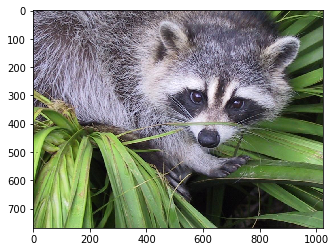

In [6]:
plt.imshow(pic)

Убедитесь, что внутри массива `pic` действительно лежат числа. Выведите первые 10 записей.
Массив состоит из троек чисел, которые характеризуют глубину цвета для каждого пикселя. Из пикселей складывается картинка.

In [22]:
print(pic[:10])

[[114 130 145 ... 119 129 137]
 [ 83 104 123 ... 118 134 146]
 [ 68  88 109 ... 119 134 145]
 ...
 [ 68  69  66 ... 130 134 137]
 [101  93  84 ... 125 114 107]
 [122 115 107 ...  73  65  62]]


Выведите значение максимального элемента в матрице. Выведите значение минимального. Выведите среднее по всем элементам матрице. В каких пределах лежат значения глубины цветов?

In [0]:
print(#тут ваш код)

## Задание 2

Теперь загрузим черно-белое изображение енота, чтобы наш массив был не 3-х мерным тензором, а двумерным массивом. Тензоры обрабатываются точно также, но для простоты пока что давайте работать с двумерными массивами, т.е. матрицами.

In [10]:
pic = misc.face(gray=True)

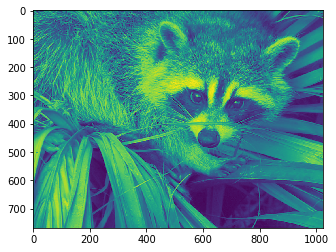

In [11]:
plt.imshow(pic)

Выведите форму (shape) полученной картинки `pic`. Какие выводы можно сделать? Положите в `h`,`w` высоту и ширину картинки.

In [13]:
print(pic.shape)
h, w = pic.shape[0], pic.shape[1]

(768, 1024)


Используя библиотеку `numpy`, отразите изображение по горизонтали. Выведите картинку.

Подсказка: не забывайте, что изображения -- это просто двумерные массивы

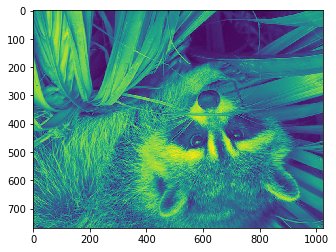

In [20]:
pic_reflected = pic[::-1]

plt.imshow(pic_reflected)

Теперь давайте повысим контрастность -- для этого к каждому пикселю прибавим 50 единиц

In [23]:
pic = pic + 50

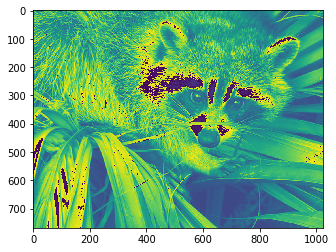

In [24]:
plt.imshow(pic)

Теперь давайте попробуем превратить наше одноканальное изображение в трехканальный (RGB) тензор. Для этого вместо каждого пикселя в одноканальном изображении (в двумерном массиве) поставим кортеж из трех элементов -- глубины красного, зеленого и голубого соотвественно. Восстановить по ч/б картинке цветной мы не можем, так как мы не можем взять утерянную информацию из ниоткуда, но можем усилить черные и белые участки. Для этого давайте заполним все три канала одинаковыми значениями, деленными на что-то очень большое. Например $--$ на $200$.  То есть, например, если в пикселе `pic[i][j]` лежало значение **200**, то для нового изображения `new_pic` мы заполняем `new_pic[i][j]` кортежем из трех чисел `int(pic[i][j]/3)`. Функция `int` $--$ округление до целой части.

In [0]:
new_pic = np.zeros((h,w,3)) #создадим пустую матрицу, куда будем записывать значения
for i in range(h):
    for j in range(w):
     #тут ваш код

In [0]:
plt.imshow(#тут ваш код)

## Задание 3

Теперь давайте уменьшим качество картинки в 16 раз, путем уменьшения качества изображения, т.е. теперь 16 пикселей по близости надо заполнить одним значением.

In [0]:
from sklearn.datasets import load_sample_image #импорт загрузчика изображения

In [0]:
china = load_sample_image('china.jpg')
plt.imshow(china)

Запишите в переменные `h`, `w`, `c` высоту, ширину, количество каналов соответственно для картинки `china`.

In [0]:
h, w, c = #тут ваш код

Теперь давайте непосредственно перейдем к изменению картинки $--$ мы предлагаем разбивать картинки на квадраты 4 на 4 и заполнять все 16 значений внутри квадрата левым верхним значением. Вы можете сделать иначе.

In [0]:
from copy import copy
compressed_pic = copy(china)
#тут ваш код     

Напишите функцию, которая считает несоотвествие между исходной и сжатой картинкой. Запустите ваш код для `compressed_pic`, `china`

In [0]:
def calculate_mismatch(a,b):
    mismatch=0
    #тут ваш код
    print(mismatch)

In [0]:
calculate_mismatch(#тут ваш код)

Посчитайте синус от каждого значения пикселей изображения `china` по всем каналам. Выведите картинку. Используйте функцию `np.sin` 

In [0]:
#тут ваш код

In [0]:
plt.imshow(#тут ваш код) 

Посмотрите на полученный результат. Как вы думаете, что можно делать с помощью такого преобразования? Какого рода объекты можно распознать?

### Задание 4*
это задание является дополнительным

Теперь давайте поработаем с аудиофайлами. Стандартный аудиофайл представляет собой обычный набор чисел, в котором хранятся значения частот, снятых с определенной периодичностью. Итак, самая простая аудиодорожка $-$ одномерный массив.

Первое, что нужно сделать $--$ установить библиотеку для работы с аудио. Она называется `librosa`. Гайд по установке: https://librosa.github.io/librosa/install.html


In [0]:
import librosa #импортируем библиотеку
import IPython.display

In [0]:
audio, sr= librosa.load('Test.wav')  
# записываем наш массив звуковых частот в файл аудио, sr -- число точек, записываемых в секунду. 
# чтобы файл открылся, он должен лежать в той же папке, что и файл HW_2.ipynb

Нашу дорожку можно воспроизвести в самом файле `.ipynb`:

In [0]:
IPython.display.Audio(audio, rate=sr)

Выведите тип данных переменной `audio`, найдите ее длительность и среднее.

In [0]:
print(#тут ваш код)

    Давайте посмотрим, как выглядит наша дорожка. Для этого используем библиотеку `matplotlib.pyplot`

In [0]:
plt.figure(figsize=(25,5))
plt.title('Test.wav')
plt.plot(audio)

Обрежьте последние 4 секунды файла

In [0]:
audio = #тут ваш код

Давайте уменьшим амплитуду на 25%. Что при этом изменится? Напоминаю, что вы всегда можете послушать изменения при помощи `IPython.display.Audio`

In [0]:
audio = #тут ваш код

А еще аудиодорожку можно ускорить. Для этого попробуйте потюнить параметр `rate`

In [0]:
IPython.display.Audio(audio, rate=sr)